# Lets first create a NLP classifier for twitter sentiment analysis 

In [1]:
import nltk
import csv
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
import pickle

from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

from nltk.classify import ClassifierI
from statistics import mode

from nltk.tokenize import word_tokenize


class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def classify(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)
        return mode(votes)

    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(mode(votes))
        conf = choice_votes / len(votes)
        return conf
        
short_pos=open(r"C:\Users\U6072707\Desktop\TensorflowProject\short_pos.txt","r").read()

#csv.reader(data1)
short_neg = open(r"C:\Users\U6072707\Desktop\TensorflowProject\short_neg.txt","r").read()

documents = []

for r in short_pos.split('\n'):
    documents.append( (r, "pos") )

for r in short_neg.split('\n'):
    documents.append( (r, "neg") )


all_words = []

short_pos_words = word_tokenize(short_pos)
short_neg_words = word_tokenize(short_neg)

for w in short_pos_words:
    all_words.append(w.lower())

for w in short_neg_words:
    all_words.append(w.lower())

all_words = nltk.FreqDist(all_words)

word_features = list(all_words.keys())[:8000]

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

#print((find_features(movie_reviews.words('neg/cv000_29416.txt'))))

featuresets = [(find_features(rev), category) for (rev, category) in documents]

random.shuffle(featuresets)

# positive data example:      
training_set = featuresets[:10000]
testing_set =  featuresets[10000:]
classifier=nltk.NaiveBayesClassifier.train(training_set)
print((nltk.classify.accuracy(classifier,testing_set))*100)


mb_classifier=SklearnClassifier(MultinomialNB())
mb_classifier.train(training_set)

B_classifier=SklearnClassifier(BernoulliNB())
B_classifier.train(training_set)

S_classifier=SklearnClassifier(SVC())
S_classifier.train(training_set)

LS_classifier=SklearnClassifier(LinearSVC())
LS_classifier.train(training_set)

NS_classifier=SklearnClassifier(NuSVC())
NS_classifier.train(training_set)



vote_classifier=VoteClassifier(classifier,mb_classifier,B_classifier,S_classifier,LS_classifier,NS_classifier)

###a="that movie was literrly a stupid movie and i don't like it at all"

def senti(a):
    text=find_features(a)
    #print(text)
    return (vote_classifier.classify(text),vote_classifier.confidence(text))


72.80966767371602


C:\Users\U6072707\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# use Tweepy to get twitter stream of data

In [2]:
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener




# Get keys from twitter API

In [3]:
ckey='eJbyDF2GhoaUEWda7YKkK396l'
cseceret='EYecC7PBZbTuC7xB9wZlu8c7QxQOEI05d12OyW2DyyNRH7KFGg'
assectoken='1050327028849889281-gSe9Dgo31QZpl46KHgxZlgLwwslJqB'
assestokensecret='tQaUr7WHAoCdOpOXklc5807Fu3gvY3VpmDKRbq4Dwoj2i'

#  Lets get the data and store it in json file and check the the sentiment for those word

In [8]:
import json

class listener(StreamListener):
    def on_data(self,data):
        all_data=json.loads(data)
        tweet=all_data["text"]
        sentiment_value, confidence =senti(tweet)
        print(tweet,sentiment_value, confidence )
        if confidence*100 >= 80:
            output = open("twitter-out.txt","a")
            output.write(sentiment_value)
            output.write('\n')  
            output.close()
        return True
    def on_error(self,status):
        print(status)
        
auth=OAuthHandler(ckey,cseceret)
auth.set_access_token(assectoken,assestokensecret)

twitterhandler=Stream(auth,listener())

#filter would track those tweets which contains the words in it

twitterhandler.filter(track=["donaldtrump"],languages=['en'])

The  Mainstream Media Versus #DonaldTrump https://t.co/R9nVVv85Ly … #CorpusChristi #Lexington #Pittsburgh… https://t.co/U8Creyyyw9 neg 0.8333333333333334
@Umarl LOL. You are more extreme than even the GOP! Only 5 US presidents (of 45) in history have been elected despi… https://t.co/rBZE2caZjq neg 0.8333333333333334
RT @BigJimLedbetter: Broward County: A cesspool of corruption, filth and FRAUD 
https://t.co/7kf9xJ0U1n

#US #Ginsburg #maga #SupremeCourt… pos 0.6666666666666666
RT @realDonaldTrump: Happy #CincoDeMayo! The best taco bowls are made in Trump Tower Grill. I love Hispanics! https://t.co/ufoTeQd8yA https… pos 0.6666666666666666
Click the link! Grab at https://t.co/BZNAhP59na See https://t.co/JrQjkUcRGl #amazon #BlackFriday #CyberMonday #Home… https://t.co/KA9I0rm3YQ neg 0.8333333333333334
Click on the link... at https://t.co/Mimb5AcDzY See https://t.co/JrQjkUcRGl #amazon #BlackFriday #CyberMonday #Home… https://t.co/7YZwhWT2VE neg 0.8333333333333334
Click the link! Grab at htt

ReadTimeoutError: HTTPSConnectionPool(host='stream.twitter.com', port=443): Read timed out.

# Lets plot the live twitter using matplotlib

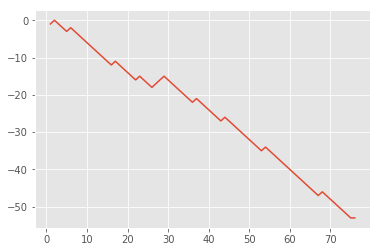

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib import style
import time

style.use('ggplot')
fig=plt.figure()

ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out.txt","r").read()
    lines = pullData.split('\n')

    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "pos" in l:
            y += 1
        elif "neg" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
animation = ani.FuncAnimation(fig, animate, interval=1000)
plt.show()